<a href="https://colab.research.google.com/github/SuciRosyida03/Tubes-Mocu/blob/main/Satelit_Pra_TMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting & Install Packages

In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install modul tambahan

In [ ]:
!pip install netcdf4 cartopy satpy pyyaml==5.4.1 pycoast
!pip install shapely --no-binary shapely --force
!pip install celluloid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 19.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a pr

In [ ]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore') #ignores simple warning
from glob import glob

import numpy as np
import xarray as xr
#from satpy import enhancements, composites
#from satpy.writers import to_image

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from celluloid import Camera # getting the camera
from IPython.display import HTML


ModuleNotFoundError: No module named 'cartopy'

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/HIMAWARI8_NC/'
!ls $datdir

Domain ruang dan waktu

In [ ]:
lon=slice(90,150)
lat=slice(30,-25)
time=slice('2021-09-22','2021-09-25')

## Convective Strom


### 22 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/22sep/'
!ls $datdir

In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

In [ ]:
files

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(4, 2, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


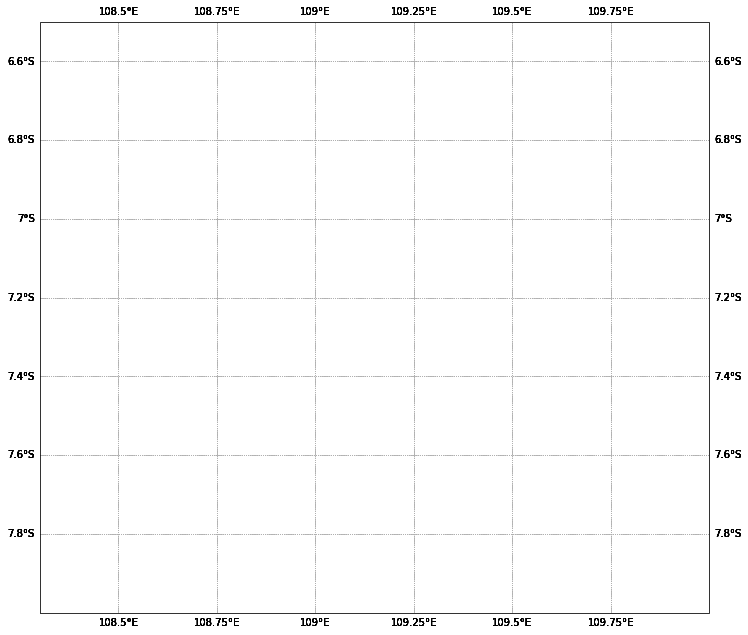

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())

### 23 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/'
!ls $datdir

NC_H08_20210923_0000_R21_FLDK.02401_02401.nc
NC_H08_20210923_0300_R21_FLDK.02401_02401.nc
NC_H08_20210923_0600_R21_FLDK.02401_02401.nc
NC_H08_20210923_0900_R21_FLDK.02401_02401.nc
NC_H08_20210923_1200_R21_FLDK.02401_02401.nc
NC_H08_20210923_1500_R21_FLDK.02401_02401.nc
NC_H08_20210923_1800_R21_FLDK.02401_02401.nc
NC_H08_20210923_2100_R21_FLDK.02401_02401.nc


In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

8

In [ ]:
files

['/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_0000_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_0300_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_0600_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_0900_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_1200_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_1500_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_1800_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/23sep/NC_H08_20210923_2100_R21_FLDK.02401_02401.nc']

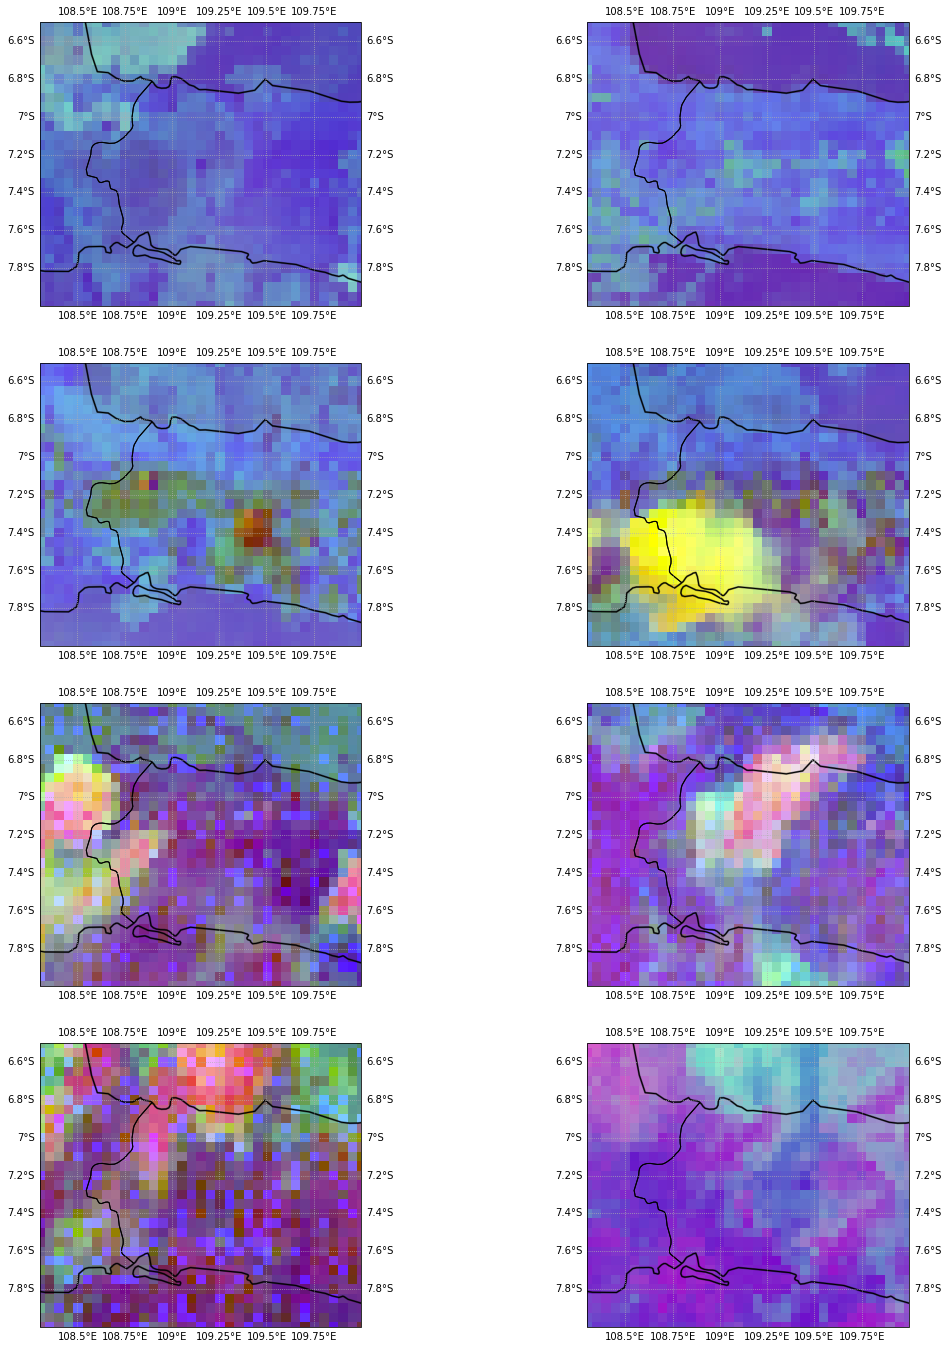

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(4, 2, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


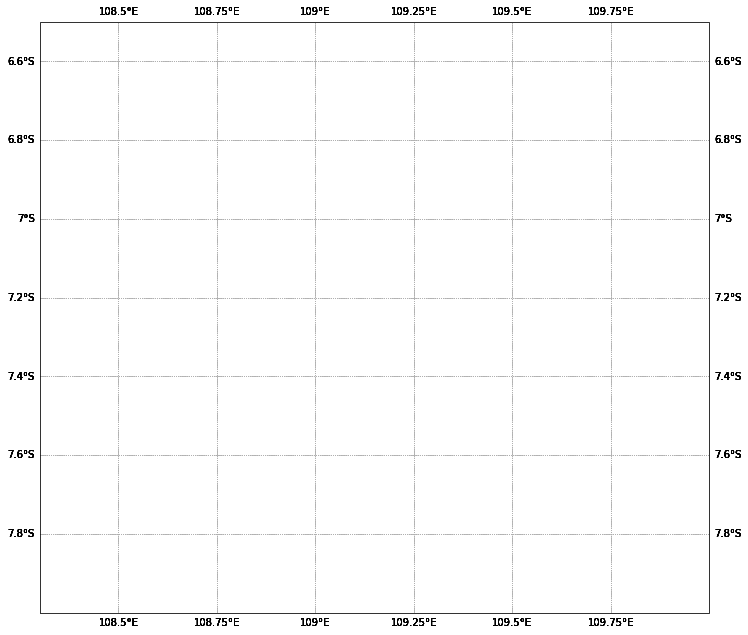

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())

### 24 Sept

In [ ]:
datdir='/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/'
!ls $datdir

NC_H08_20210924_0000_R21_FLDK.02401_02401.nc
NC_H08_20210924_0300_R21_FLDK.02401_02401.nc
NC_H08_20210924_0600_R21_FLDK.02401_02401.nc
NC_H08_20210924_0900_R21_FLDK.02401_02401.nc
NC_H08_20210924_1200_R21_FLDK.02401_02401.nc
NC_H08_20210924_1500_R21_FLDK.02401_02401.nc
NC_H08_20210924_1800_R21_FLDK.02401_02401.nc
NC_H08_20210924_2100_R21_FLDK.02401_02401.nc


In [ ]:
#Data Himawari 8
files=glob(datdir+'NC_H08*')
len(files)

8

In [ ]:
files

['/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_0000_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_0300_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_0600_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_0900_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_1200_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_1500_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_1800_R21_FLDK.02401_02401.nc',
 '/content/drive/MyDrive/TUBES_MOCU/Composite/24sep/NC_H08_20210924_2100_R21_FLDK.02401_02401.nc']

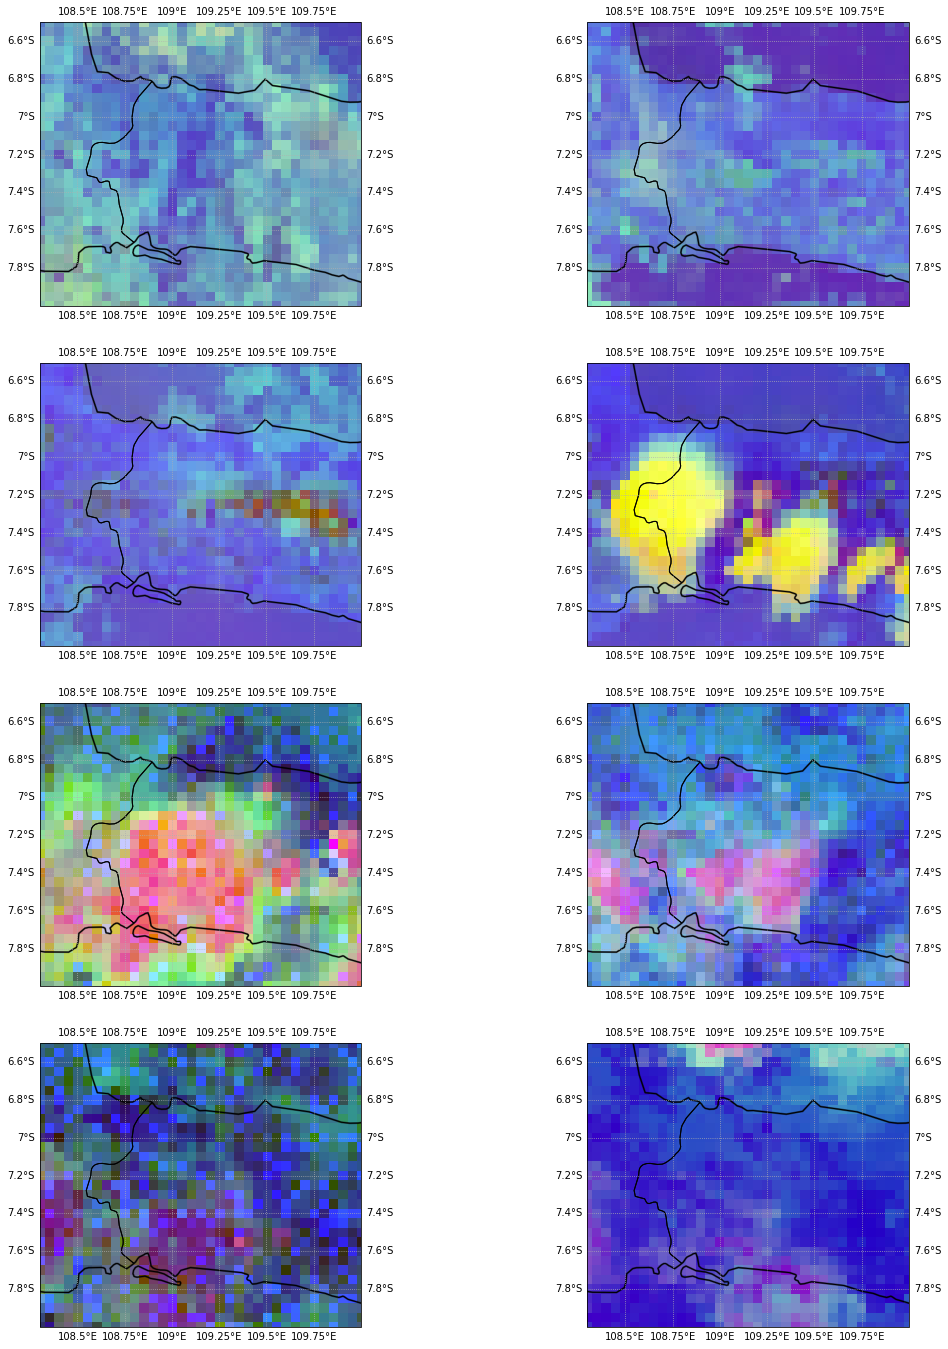

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(18, 24))

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)
  ds_crop

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax = fig.add_subplot(4, 2, i+1, projection=mproj)
  # Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')


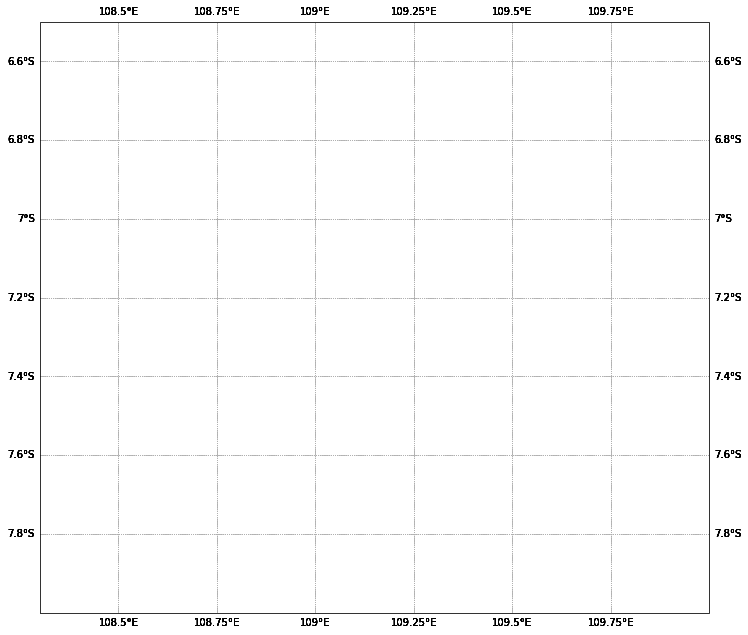

In [ ]:
mproj=ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
ax = fig. add_subplot(1, 1, 1, projection=mproj)

for i in range(len(files)):
  #baca data
  ds=xr.open_dataset(files[i])
  #crop
  ds_crop=ds.sel(longitude=lon,latitude=lat)

  #komposit AirMass
  comp_dif=composites.DifferenceCompositor('diffcomp')
  r_band = comp_dif((ds_crop['tbb_10'],ds_crop['tbb_08']))
  g_band = comp_dif((ds_crop['tbb_13'],ds_crop['tbb_07']))
  b_band = comp_dif((ds_crop['albedo_03'],ds_crop['albedo_05']))
  comp = composites.GenericCompositor('convective')
  my_rgb = comp((r_band, g_band, b_band))
  my_rgb=my_rgb.rename({'longitude': 'x','latitude': 'y'})
  #images
  img = to_image(my_rgb)
  enhancements.stretch(img,stretch= 'linear')
  # enhancements.stretch(img,
  #                      stretch ='crude',
  #                      min_stretch = [0, -4.3, 208.0],
  #                      max_stretch = [25.8, 41.5, 242.6])
  #enhancements.stretch(img,stretch= 'crude')
  img.gamma([1,0.5,0.95])
  img.invert([True,True,True])
  img_data = img.data

  #gambar seperti biasa
  ax.set_extent([108.3, 110, -6.5, -8],crs=mproj)
# Tambahkan beberapa elemen peta ke plot untuk membuatnya dikenali.
  ax.add_feature(cfeature.LAND)
  ax.add_feature(cfeature.OCEAN)
  ax.add_feature(cfeature.LAKES)
  ax.add_feature(cfeature.STATES)
  ax.add_feature(cfeature.BORDERS)
  #  ax.add_feature(cfeature.RIVERS)
  ax.coastlines(color='black',linewidth=2,alpha=0.5)
  ax.gridlines(draw_labels=True,linestyle=':')
  img_data.plot.imshow(ax=ax,
                       transform=mproj,
                       vmin=0,
                       vmax=1,
                       rgb='bands')
  # ax.set_title(files[i][-41:-24])
  ax.text(90.5,28.5,files[i][-41:-24])

  camera.snap()

animation = camera.animate(interval = 1000, repeat = False)

In [ ]:
HTML(animation.to_html5_video())